# Read SPT 100d $yy$ data products

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
#load modules
import numpy as np, glob, sys

show_plot = True
if show_plot:
    from pylab import *
    #plot(); show()
    rcParams['figure.dpi'] = 150
    rcParams['font.family'] = 'serif'
    rcParams['figure.facecolor'] = 'white'
    #plot(); show()    


### ########################################################################
# Bandpowers, covariance matrices, and Bandpower window functions (BPWF)
### ########################################################################

In [17]:
fname = 'publish/bandpowers_and_cov/spt_100d_dl_yy_bandpowers_and_cov_all_estimators.npy'
spt_100d_yy_dict = np.load(fname, allow_pickle = True).item()
ilc_key_arr = [('ymv', 'ymv'), ('ycibfree', 'ycibfree'), ('ycibfree', 'ymv')]
el_eff = spt_100d_yy_dict['el_eff']
el_min = spt_100d_yy_dict['el_min']
el_max = spt_100d_yy_dict['el_max']
bpwf = spt_100d_yy_dict['bpwf']
print( '\n100d SPT yy results.\n\nEstimators are: ', list(spt_100d_yy_dict.keys()) )

#data
for m1m2 in ilc_key_arr:
    m1, m2 = m1m2
    print('\n\tEstimator = %sx%s' %(m1, m2))
    dl_yy = spt_100d_yy_dict[m1m2]['bandpower'] #Dl_yy [1e12]
    dl_yy_err = spt_100d_yy_dict[m1m2]['bandpower_error'] #Dl_yy_err [1e12] 
    dl_yy_cov = spt_100d_yy_dict[m1m2]['cov'] #Dl_yy_cov [1e12]
    print('\t\t', 'el_eff =', el_eff)
    print('\t\t', 'dl_yy =', dl_yy)
    print('\t\t', 'dl_yy_err =', dl_yy_err)


100d SPT yy results.

Estimators are:  ['el_eff', 'bpwf', 'el_min', 'el_max', 'delta_el', ('ymv', 'ymv'), ('ycibfree', 'ycibfree'), ('ycibfree', 'ymv')]

	Estimator = ymvxymv
		 el_eff = [ 750. 1250. 1750. 2250. 2750. 3250. 3750. 4250. 4750.]
		 dl_yy = [0.3874191  0.41697756 0.40722179 0.57300277 0.67155125 0.64040909
 0.59087548 0.654273   0.63533072]
		 dl_yy_err = [0.20979787 0.14851846 0.1269094  0.11088423 0.09341208 0.08276539
 0.08479397 0.08692268 0.09399785]

	Estimator = ycibfreexycibfree
		 el_eff = [ 750. 1250. 1750. 2250. 2750. 3250. 3750. 4250. 4750.]
		 dl_yy = [0.56661888 0.50512548 0.46756056 0.54718716 0.66731365 0.62197424
 0.58014743 0.65117204 0.62898178]
		 dl_yy_err = [0.21750301 0.14848823 0.13705187 0.11486615 0.09548166 0.08249556
 0.08623394 0.08811555 0.09478625]

	Estimator = ycibfreexymv
		 el_eff = [ 750. 1250. 1750. 2250. 2750. 3250. 3750. 4250. 4750.]
		 dl_yy = [0.48262144 0.46112836 0.42705692 0.54636736 0.66819478 0.6208671
 0.58355304 0.65307235 0

### ########################################################################
# Let us now plot the BPWF
* ## The dimension of BPWF is length(el_unbinned) x total_el_bins
* ### In our case: $\ell_{\rm min}$ = 500; $\ell_{\rm max}$ = 5000; $\Delta_\ell$ = 500.
    * #### Thus, el_unbinned = np.arange(lmin, lmax+1); total_el_bins = 9; BPWF is 5001 x 9 matrix
* ## The bandpowers are binned with equal weights in $C_{\ell}$ space.
    * ### As a result, BPWF is simply 1/$\Delta_\ell$ (=1/500 = 0.002) in each bin.
    
# Comparing theory spectrum with bandpowers
* ## In case you have some theory spectrum and would like to compare that to the measured bandpowers, you must use the BPWF.
    * ## You can do this by 
        ```cl_theory_binned = np.dot( bpwf, cl_theory_unbinned)```
    * ### Below, we will one show such example using a theory curve from FLAMINGO simulations. *Note that this is not a fit! Just an example*.
    * ### The FLAMINGO bandpowers come from Fig. 6 of [McCarthy et al. 2024](https://arxiv.org/pdf/2410.19905). Thanks to Ian McCarthy for providing these.
    
### ########################################################################


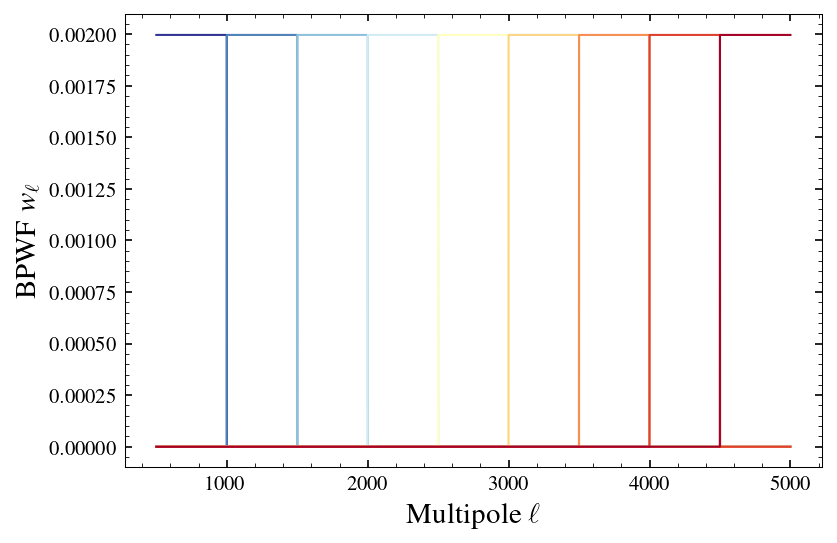

/var/folders/08/mkcy0rls72j2q09krs7qx2jw0000gn/T/ipykernel_3614/738921116.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  flamingo_data = np.asarray( pk.load( open(flamingo_fname,'rb') ) ).T


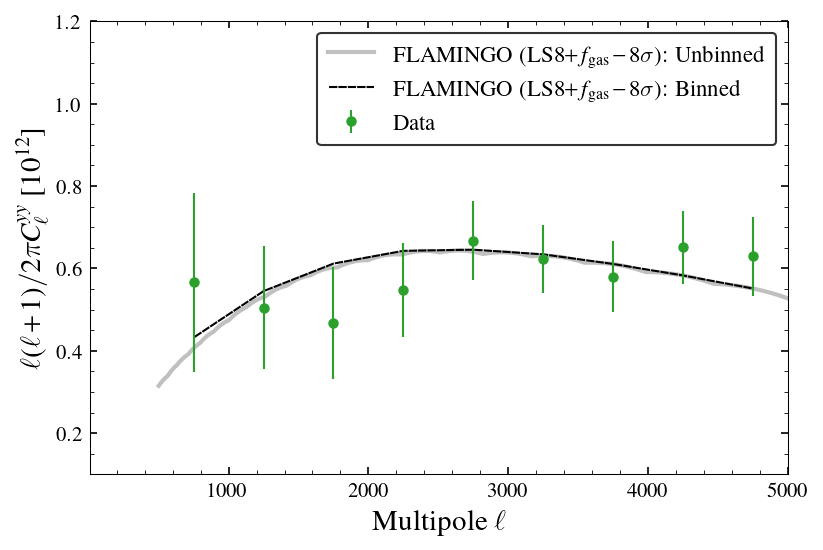

In [45]:
el_eff = spt_100d_yy_dict['el_eff']
el_min = spt_100d_yy_dict['el_min']
el_max = spt_100d_yy_dict['el_max']
bpwf = spt_100d_yy_dict['bpwf']

el_unbinned = np.arange( el_min, el_max + 1)
clf()
fsval = 14
color_arr = [cm.RdYlBu_r(int(d)) for d in np.linspace(0, 255, len(bpwf))]
for b in range(len(bpwf)):
    plot( el_unbinned, bpwf[b], color = color_arr[b])
xlabel(r'Multipole $\ell$', fontsize = fsval)
ylabel(r'BPWF $w_{\ell}$', fontsize = fsval)
show();

# Compare with FLAMINGO simulations
#flamingo_fname = 'data/flamingo_LS8_fgas_8sigma.txt'
#flamingo_el, flamingo_dl = np.loadtxt(flamingo_fname, unpack = True, delimiter = ',')
import pickle as pk
flamingo_fname = 'data/FLAMINGO_tSZ_power_spectra/LS8_fgas-8sig.pickle'
flamingo_data = np.asarray( pk.load( open(flamingo_fname,'rb') ) ).T
flamingo_el, flamingo_cl = flamingo_data[0], flamingo_data[1] * 1e12

#interpolate to get the power in the unbinned \ells.
flamingo_cl_unbinned = np.interp( el_unbinned, flamingo_el, flamingo_cl) 

#bin theory using BPWF
flamingo_cl_binned = np.dot( bpwf, flamingo_cl_unbinned )


clf()
reqd_m1m2 = ('ycibfree', 'ycibfree')
dl_fac = el_eff * (el_eff+1)/2/np.pi
ax = subplot(111)
fsval = 14
#data
data_dl_yy = spt_100d_yy_dict[reqd_m1m2]['bandpower'] #Dl_yy [1e12]
data_dl_yy_err = spt_100d_yy_dict[reqd_m1m2]['bandpower_error'] #Dl_yy_err [1e12] 
errorbar(el_eff, data_dl_yy, 
         yerr = data_dl_yy_err, 
         color = 'tab:green', 
         marker = 'o', 
         ms = 4., 
         capsize = 0,
         label = r'Data', 
         ls = 'None', 
         zorder = 1000,
        )

#FLAMINGO
flamingo_name = r'LS8$+f_{\rm gas}-8\sigma$'
plot(el_unbinned, dl_fac_unbinned * flamingo_cl_unbinned, color = 'silver', label = r'FLAMINGO (%s): Unbinned' %(flamingo_name), ls = '-', lw = 2.)
plot(el_eff, dl_fac * flamingo_cl_binned, color = 'black', label = r'FLAMINGO (%s): Binned' %(flamingo_name), ls = (4, (4, 0.5)), lw = 1.)
xlim(10., 5000.); ylim(0.1, 1.2)
legend(loc = 1, fontsize = fsval - 3)
xlabel(r'Multipole $\ell$', fontsize = fsval)
ylabel(r'$\ell(\ell+1)/2\pi C_{\ell}^{yy}$ [$10^{12}$]', fontsize = fsval)
show()


### ########################################################################
# Masks
### ########################################################################

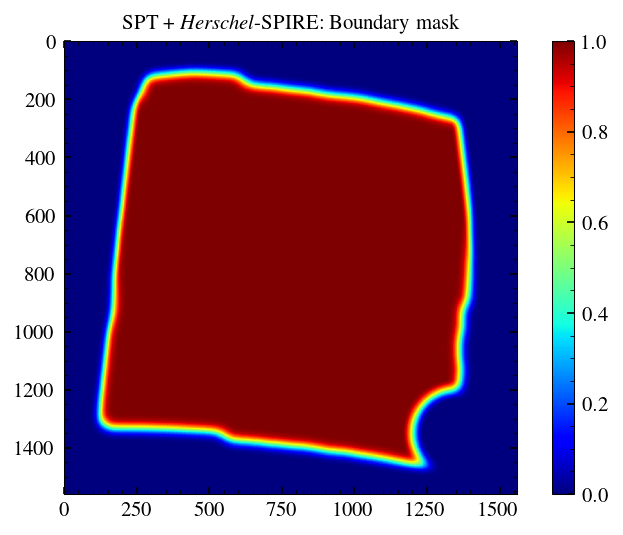

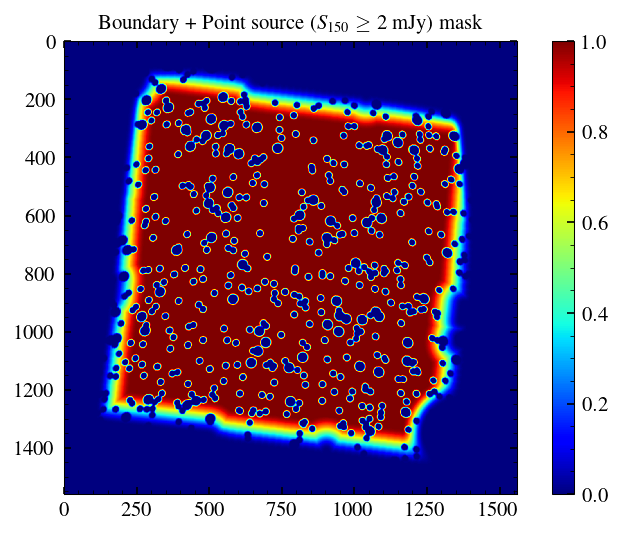

In [9]:
map_folder = 'publish/maps_and_masks/'
spt_100d_yy_mask_dict_fname = '%s/masks.npy' %(map_folder)
spt_100d_yy_mask_dict = np.load( spt_100d_yy_mask_dict_fname, allow_pickle = True ).item()

spt_100d_yy_boundary_mask = spt_100d_yy_mask_dict['apod_mask']
spt_100d_yy_boundary_plus_source_mask = spt_100d_yy_mask_dict['mask']

if show_plot:
    imshow(spt_100d_yy_boundary_mask); colorbar(); 
    title(r'SPT + {\it Herschel}-SPIRE: Boundary mask', fontsize = 10 ); 
    show()
    
    imshow(spt_100d_yy_boundary_plus_source_mask); colorbar(); 
    title(r'Boundary + Point source ($S_{150} \ge $ 2 mJy) mask ', fontsize = 10 ); 
    show()    
    